# Daniel Silva - STA 5900 
# 3-4-22 - Homework 3

## Problem 1 
### a) P-Value
P-value describes the likelihood that your data is agreeing with your null hypothesis.
### b) Law of Large Numbers
As you contine to sample a larger and larger data set of numbers. If you take the average of that data set it will begin to approximate your expected value. If the data set is infinitely large, then it will no longer be an approximation, but the true expected value. 
### c) Correlation
This is a simple way to describe linear relationship between two things. 
If two things are related such as the position of the moon and the the height of the tides. From a physical persepective, we know that the moon's gravity contributes to the rise and fall of the tides. However, it is important to note that Correlation does not imply causation. This can be explained because even thought the moon is correlated with the tide, the tide does not cause the moon to rise. 
### d) Least Squares Regression Line
Least Squares is a way to select a best fit line to a set of data points. You will try to create a line where the sum of all the distances between your line and the actual data points are minimized.

### Import necessary packages as well as the two relevant datasets

In [155]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

In [21]:
# read the data sets 
data = pd.read_excel("rice.xlsx")
heightDF = pd.read_csv("heightByGenderDataset.csv")

This data set from Kaggle looks at 75000 grains of rice at describes various features about each grain, including size, eccentricity, class, perimeter, and many others. Total number of features are 107.

In [6]:
data.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,...,ALLdaub4L,ALLdaub4a,ALLdaub4b,ALLdaub4Y,ALLdaub4Cb,ALLdaub4Cr,ALLdaub4XX,ALLdaub4YY,ALLdaub4ZZ,CLASS
0,7805,437.915,209.8215,48.0221,0.9735,99.6877,0.9775,7985,0.3547,4.3693,...,113.9924,65.0610,59.5989,104.8552,67.8779,63.0828,0.3673,0.3793,0.4733,Basmati
1,7503,340.757,138.3361,69.8417,0.8632,97.7400,0.9660,7767,0.6637,1.9807,...,105.7055,64.3685,62.2084,96.8375,65.5371,63.5832,0.3014,0.3144,0.3641,Arborio
2,5124,314.617,141.9803,46.5784,0.9447,80.7718,0.9721,5271,0.4760,3.0482,...,109.7155,62.6423,58.7439,100.2352,68.9753,59.8342,0.3233,0.3445,0.4448,Jasmine
3,7990,437.085,201.4386,51.2245,0.9671,100.8622,0.9659,8272,0.6274,3.9325,...,116.5405,64.9069,60.2562,107.2560,67.3298,63.2237,0.3880,0.4020,0.4904,Basmati
4,7433,342.893,140.3350,68.3927,0.8732,97.2830,0.9831,7561,0.6006,2.0519,...,107.7502,64.7071,61.3549,98.8704,66.2048,63.5378,0.3184,0.3303,0.3928,Arborio


<Figure size 1296x720 with 0 Axes>

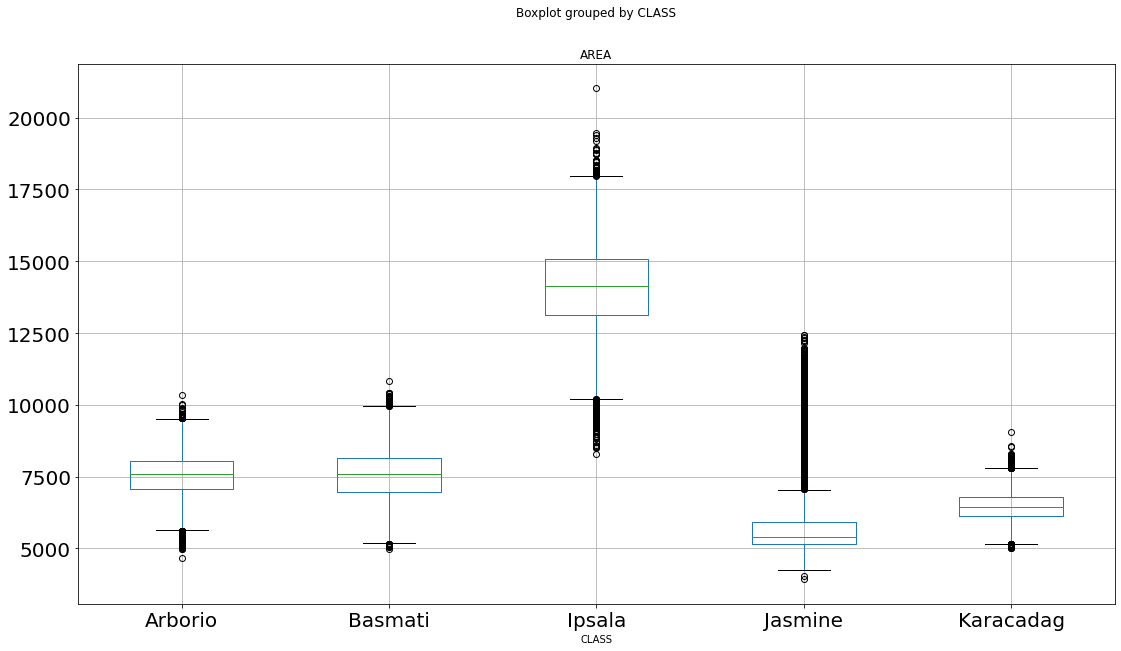

In [153]:
# Box plot for Rice types and Area 
fig = plt.figure(figsize = (18,10))
data.boxplot(by ='CLASS', column =['AREA'], grid = True, figsize=(18,10),fontsize=20)
plt.show()

## Height by Gender by Country dataset 
This data set displays the average height of males and females depending on the country.
For each country, there is an average male and female height associated with it. 

In [22]:
heightDF.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,1,Netherlands,183.78,170.36,6.03,5.59
1,2,Montenegro,183.30,169.96,6.01,5.58
2,3,Estonia,182.79,168.66,6.00,5.53
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49
4,5,Iceland,182.10,168.91,5.97,5.54


In [51]:
males = heightDF['Male Height in Ft']
females = heightDF['Female Height in Ft']

In [138]:
def plotPoly(x,y,deg):
    polys = np.polyfit(x,y,deg)
    eqs = 0
    for i in range(deg+1):
        eqs = eqs + polys[i]*x**(deg-i)
    return eqs

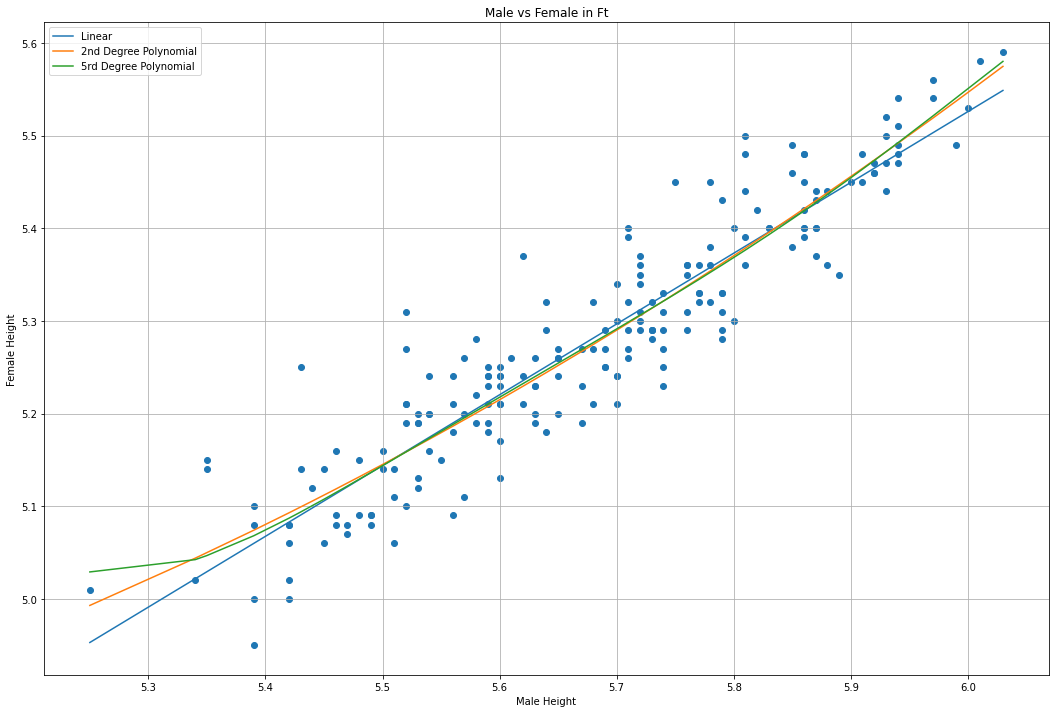

In [154]:
fig = plt.figure(figsize =(18,12))
plt.scatter(heightDF['Male Height in Ft'],heightDF['Female Height in Ft'])
plt.title('Male vs Female in Ft') # title
plt.xlabel('Male Height') # x label
plt.ylabel('Female Height') # y label
m,b = np.polyfit(heightDF['Male Height in Ft'],heightDF['Female Height in Ft'],1)
polys = np.polyfit(males,females,2)
plt.plot(males,m*males+b,label='Linear')
#plt.plot(males,polys[0]*np.square(males)+poly[1]*males+poly[2])
eqs2 = plotPoly(males,females,2)
eqs3 = plotPoly(males,females,5)
plt.plot(males,eqs2,label='2nd Degree Polynomial')
plt.plot(males,eqs3,label='5rd Degree Polynomial')
plt.legend()
plt.grid()
plt.show()

Each point in the scatter plot represents one country from the list and uses the male and female height associated with it as it's coordinate point. 
There are 3 different lines/curves that are trying to best fit the given data. A linear fit, 2nd degree polynomial fit, and a 5th degree polynomial fit.  
The 3 different models all seem to do a reasonable approximation at first glance, but the 5th order polynomial fit could suffer from overfitting when introduced to new data.  
Both the linear and 2nd order polynomial model can be used to show the relationship between average male height and average female height based on that which country they came from. 
For example, say there is a country that is not on this list, that only has recorded average female height in their country. This model may be used to give an approximation of average male height by tracking where the model's x-value is with the corresponding y-value. 